In [1]:
#Where's  your data??
# path_to_nmr_data='data/ubi_soln.txt'  #Data stored locally
path_to_nmr_data='https://github.com/alsinmr/pyDR_tutorial/raw/main/data/ubi_soln.txt' #Github raw link
# path_to_nmr_data='https://drive.google.com/file/d/1U4mGNGyIEH9XNqDvI4qUWQZagPkwi7dx/view?usp=share_link' #Google drive share link

# How many detectors
n=4

# Do you have S2 data in your text file?
inclS2=True

#Is there a PDB ID or saved topology file associated with your structure? 
#(set =None if no structure)
topo='1D3Z'

#What Nucleus did you measure? (see below for more explanation)
Nuc='N'  #This refers to the backbone nitrogen, specifically
segids=None # Usually, segment does not need to be specified

In [2]:
# SETUP pyDR
import os
os.chdir('../..')

In [3]:
#Imports
import pyDR

In [4]:
data=pyDR.IO.readNMR(path_to_nmr_data)

In [5]:
ls

2KJ3.pdb                 POPC_frames_archive/     pyDR/
CerEOS_archive/          Papers/                  pyDRIFRATE_test_scripts/
ConferenceExamples/      SLEEPY/                  pyDR_tutorial/
Databank/                WindeschleubaNMRSchool/  temp496
Frames_Theory_archive/   Yreceptor_archive/       temp944
GHSR_archive/            alsi_tools/              test_module/
GlpG_pyDR/               csdmpy/                  testproj/
HETs_Methyl_archive/     misc_tools/              testproject/
KaiDiffrate/             pyDIFRATE/


In [6]:
proj=pyDR.Project(directory=None)    #Include a directory to save the project
proj.append_data(data)

In [7]:
if topo is not None and Nuc is not None:
    data.select=pyDR.MolSelect(topo=topo)
    data.select.select_bond(Nuc=Nuc,resids=data.label,segids=None)

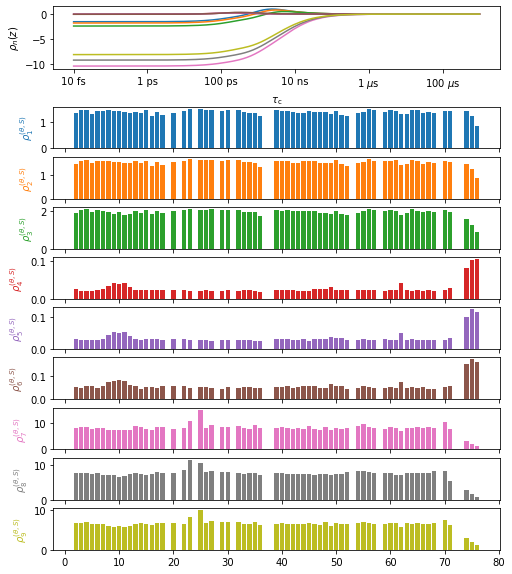

In [8]:
plt_obj=data.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])

In [9]:
data.detect.r_auto(n)    #Set number of detectors here

fit=data.fit()  #Fit the data

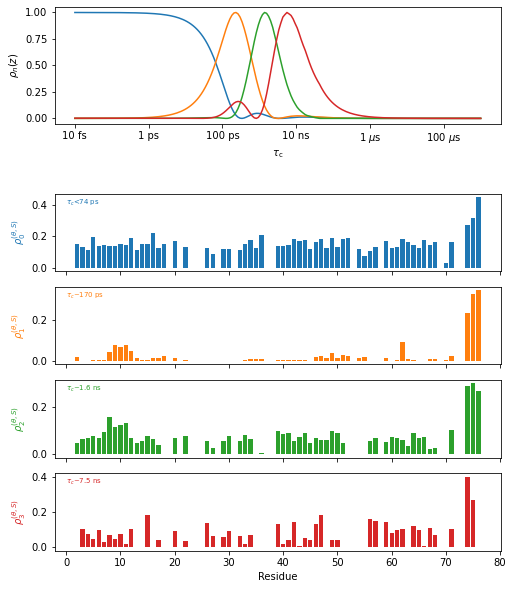

In [10]:
proj.close_fig('all')
plt_obj=fit.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])
plt_obj.show_tc()
_=plt_obj.ax[-1].set_xlabel('Residue')

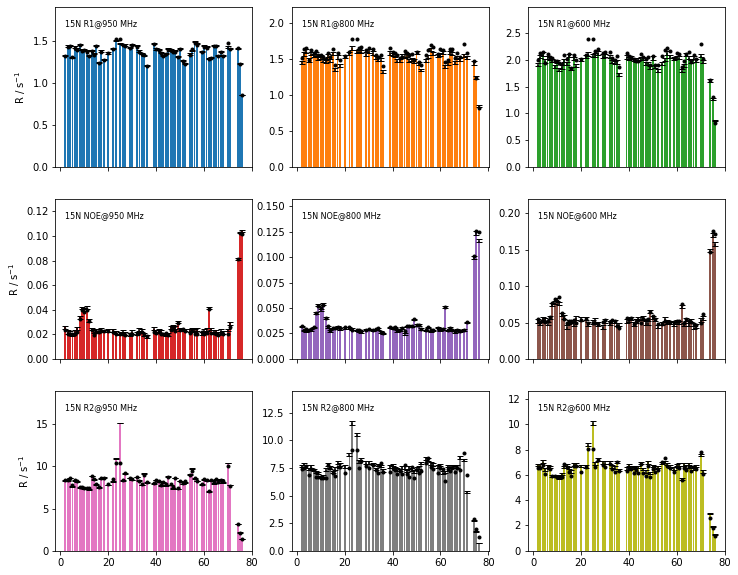

In [11]:
fig=fit.plot_fit()[0].axes.figure
fig.set_size_inches([12,10])

In [12]:
fit.nglview(1,scaling=None)

NGLWidget(max_frame=9)

In [13]:
fit.chimera()